In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from numpy import array

In [56]:
def parse_data(filename):
    df = pd.read_csv(filename)
    df = df[["Calculated LCOE","Year"]].iloc[2:]
    df["Calculated LCOE"] = pd.to_numeric(df["Calculated LCOE"])
    df["Year"] = pd.to_numeric(df["Year"])
    return df.groupby('Year').mean().reset_index()

In [57]:
onshore_wind["Calculated LCOE"]

0     0.151000
1     0.102000
2     0.104000
3     0.070000
4     0.085000
5     0.094000
6     0.064000
7     0.066000
8     0.056000
9     0.082000
10    0.053000
11    0.060000
12    0.093333
13    0.077333
14    0.066143
15    0.061000
16    0.055000
17    0.050250
18    0.049857
19    0.049857
20    0.053923
21    0.070833
22    0.076500
23    0.078429
24    0.064500
25    0.068333
26    0.054667
Name: Calculated LCOE, dtype: float64

In [58]:
offshore_wind = parse_data("./renewable_data/generation.lcoe.20190810_326.csv")
hydroelectric = parse_data("./renewable_data/generation.lcoe.20190810_331.csv")
nuclear = parse_data("./renewable_data/generation.lcoe.20190810_332.csv")
coal = parse_data("./renewable_data/generation.lcoe.20190810_333.csv")
photovoltaic = parse_data("./renewable_data/generation.lcoe.20190810_327.csv")
onshore_wind = parse_data("./renewable_data/generation.lcoe.20190810_328.csv")

In [76]:
nuclear

,Year,Calculated LCOE
0,2000,0.059000
1,2001,0.059000
2,2002,0.059000
3,2003,0.059000
4,2004,0.059000
5,2005,0.053000
6,2006,0.048333
7,2007,0.053000
8,2008,0.052500
9,2009,0.087200


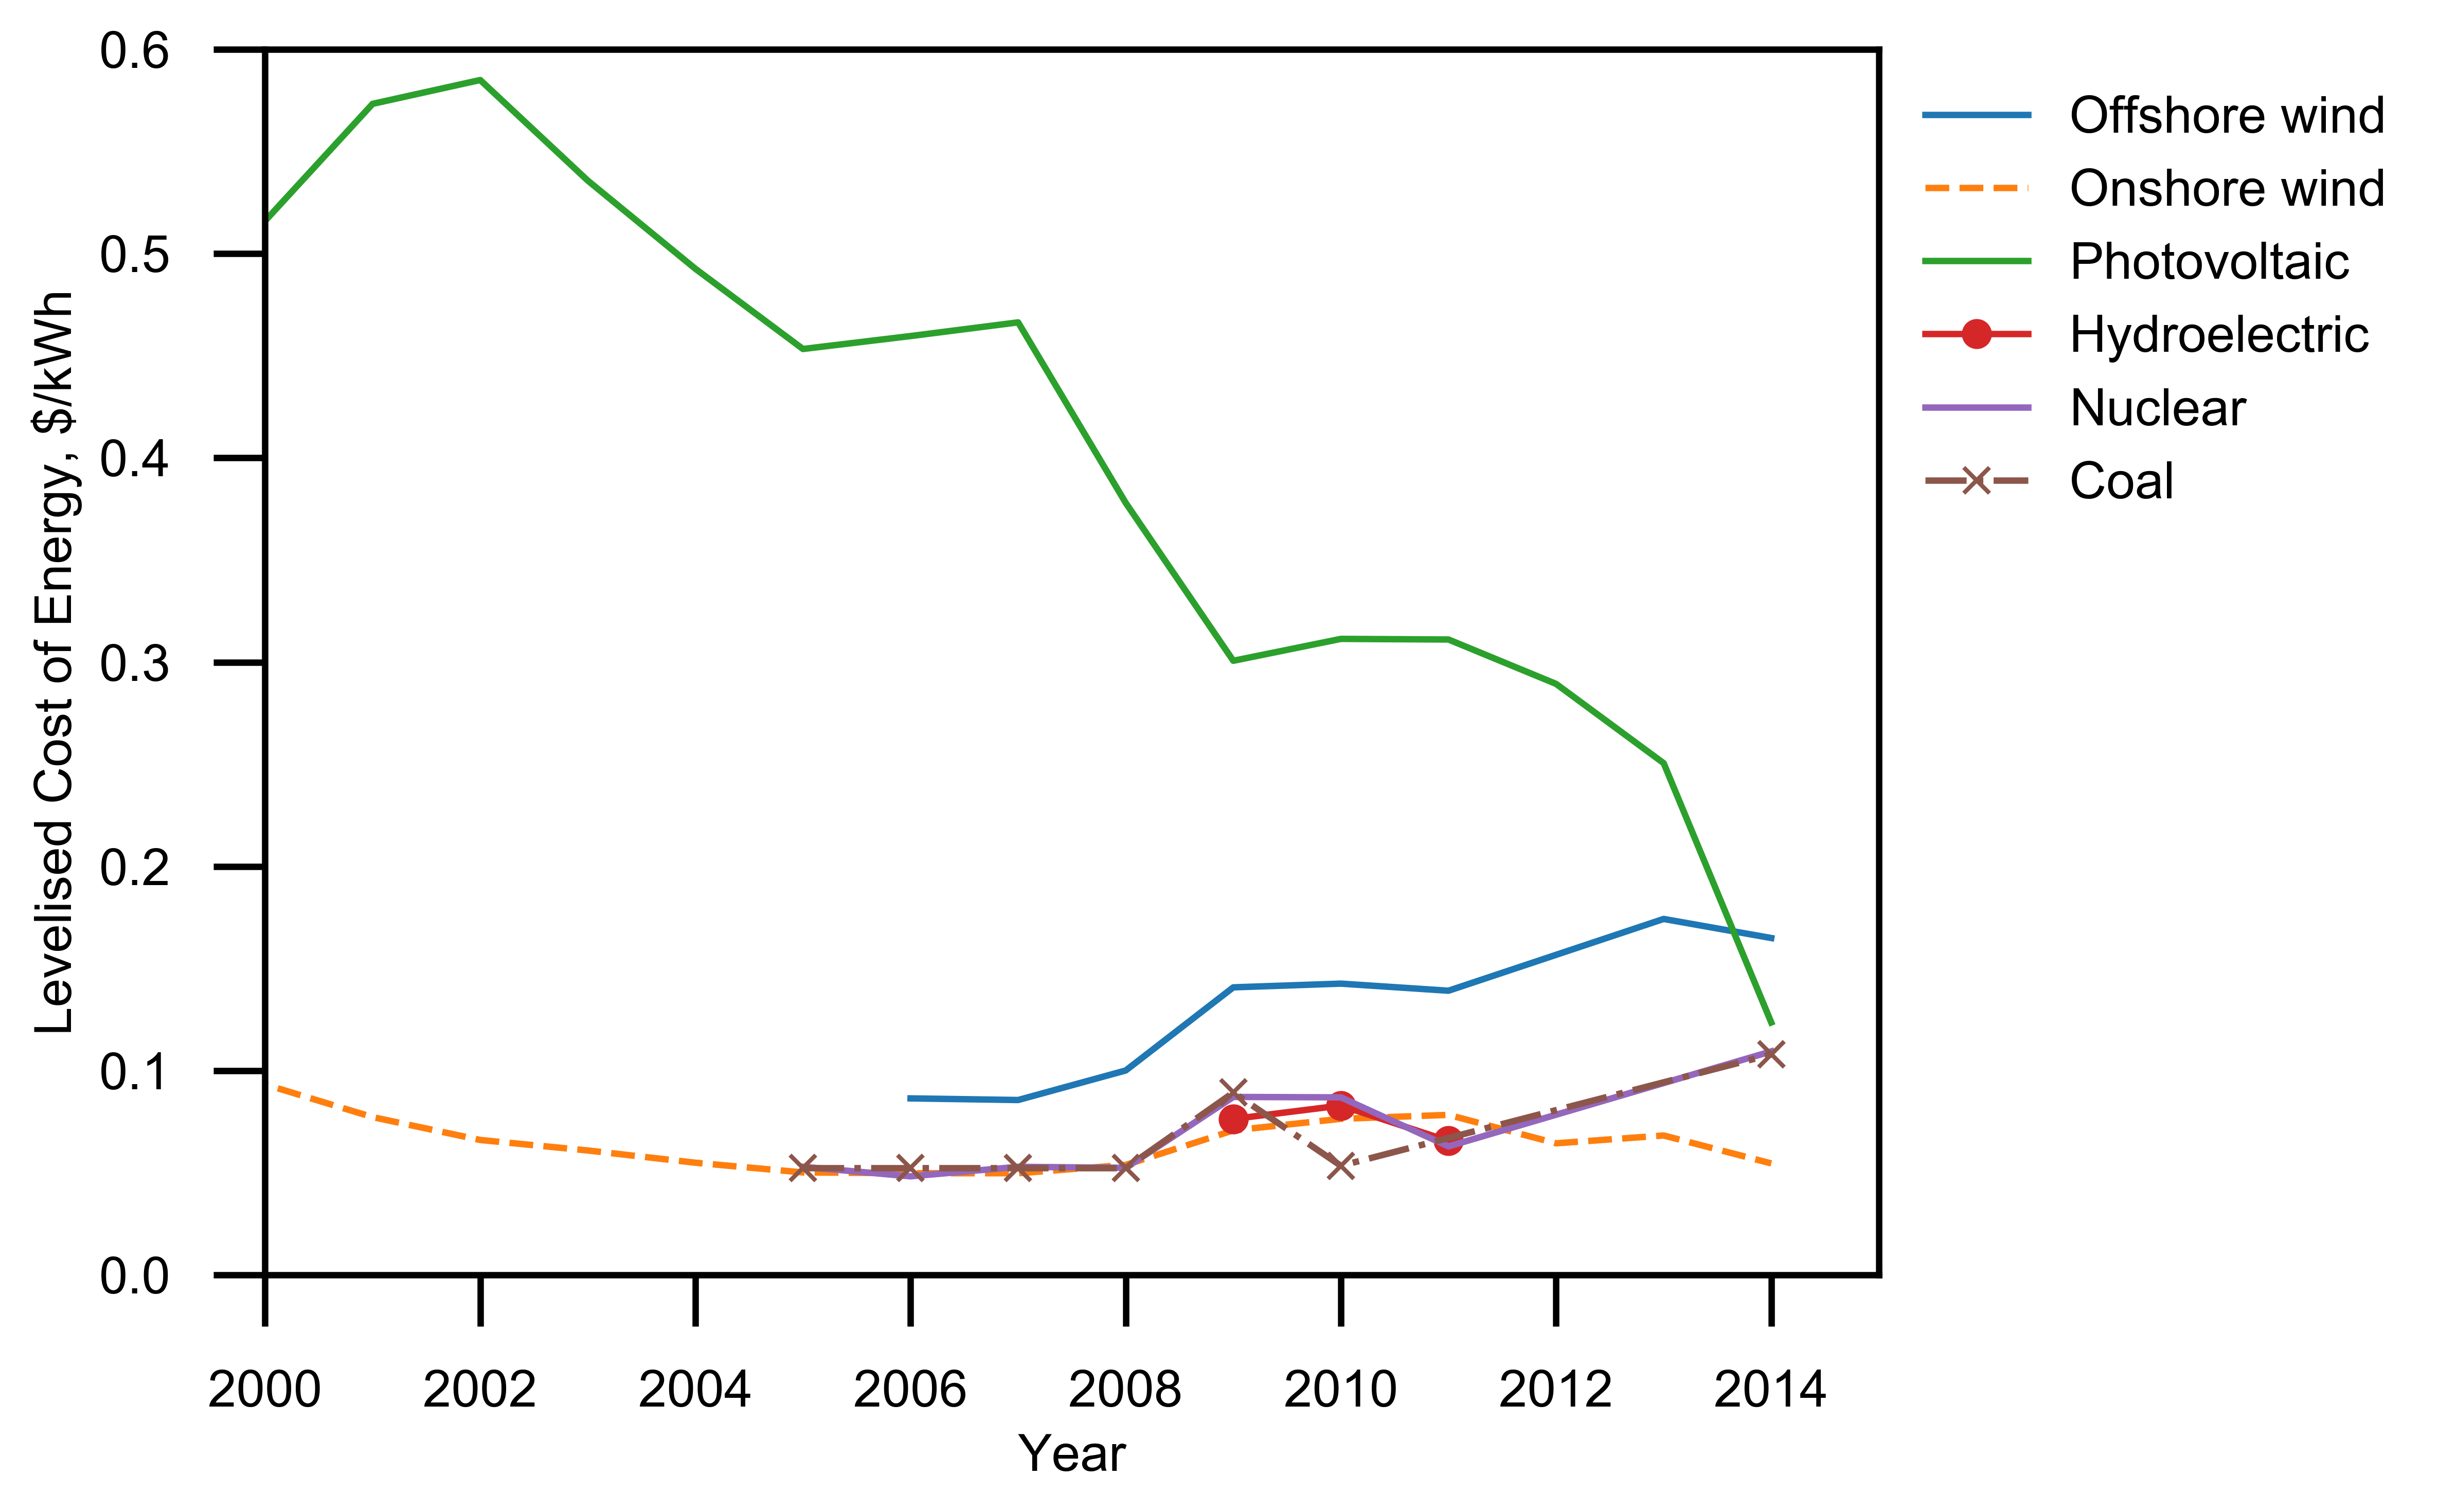

In [97]:
default_colours = [[240, 163, 255], [0, 117, 220], [153, 63, 0], [76, 0, 92],
                   [66, 102, 0], [255, 0, 16], [157, 204, 0], [194, 0, 136],
                   [0, 51, 128], [255, 164, 5], [255, 255, 0], [255, 80, 5],
                   [94, 241, 242], [116, 10, 255], [153, 0, 0], [0, 153, 143],
                   [0, 92, 49], [43, 206, 72], [255, 204, 153], [148, 255, 181],
                   [143, 124, 0], [255, 168, 187], [128, 128, 128]]
rgb_colours = array(default_colours)/255

default_fonts = ['Arial', 'Whitney Book', 'Helvetica',
                 'Liberation Sans', 'Andale Sans']
width = 8
height = 5

ticklabelsize = 12
ticksize = 12
linewidth = 1.5

plt.figure(figsize=(width, height), facecolor="w", dpi=600)

ax = plt.gca()
ax.tick_params(width=linewidth, size=ticksize)
ax.tick_params(which='major', size=ticksize, width=linewidth,
               labelsize=ticklabelsize, pad=10)
ax.tick_params(which='minor', size=ticksize/2, width=linewidth)

ax.set_title(ax.get_title(), size=12)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(linewidth)

labelsize = 12

ax.set_xlabel(ax.get_xlabel(), size=labelsize)
ax.set_ylabel(ax.get_ylabel(), size=labelsize)

rc('font', **{'family': 'sans-serif', 'sans-serif': default_fonts})
rc('text', usetex=False)
rc('pdf', fonttype=42)
rc('mathtext', fontset='stixsans')


plt.plot(offshore_wind["Year"][6:],offshore_wind["Calculated LCOE"][6:],label="Offshore wind")
plt.plot(onshore_wind["Year"],onshore_wind["Calculated LCOE"],label="Onshore wind",linestyle="--")
plt.plot(photovoltaic["Year"],photovoltaic["Calculated LCOE"],label="Photovoltaic")
plt.plot(hydroelectric["Year"][9:],hydroelectric["Calculated LCOE"][9:],label="Hydroelectric",marker="o")
plt.plot(nuclear["Year"][5:],nuclear["Calculated LCOE"][5:],label="Nuclear")
plt.plot(coal["Year"][5:],coal["Calculated LCOE"][5:],label="Coal",marker="x",linestyle="-.")

ax.legend(bbox_to_anchor=(1, 1), loc=2, frameon=False,
                  fontsize=12, numpoints=1)



plt.xlim([2000,2015])
plt.ylim([0,0.6])

#x0, x1 = ax.get_xlim()
#y0, y1 = ax.get_ylim()
#ax.set_aspect(((x1-x0)/(y1-y0)) * (height/width))



ax.set_ylabel("Levelised Cost of Energy, $/kWh")
ax.set_xlabel("Year")




#ax.tick_params(which='major', pad=10)
#ax.tick_params(which='minor', size=6)

    
#plt.xticks()

plt.tight_layout()
plt.savefig("renewable_LCOE.png")

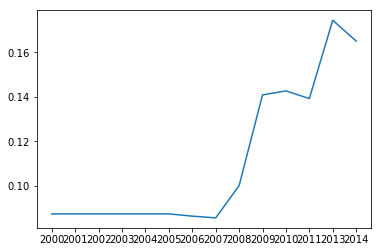

In [38]:
plt.plot(offshore_wind["Year"],offshore_wind["Calculated LCOE"])

In [32]:
ow_short.groupby('Year').mean().reset_index()

,Year,Calculated LCOE
0,2000,0.087500
1,2001,0.087500
2,2002,0.087500
3,2003,0.087500
4,2004,0.087500
5,2005,0.087500
6,2006,0.086500
7,2007,0.085700
8,2008,0.100154
9,2009,0.140857
